<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/assignment_3-Breast-Cancer_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Import packages
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from IPython.core.pylabtools import figsize

In [45]:
# import the dataset from the data.csv file

cell_df = pd.read_csv("breast-cancer-wisconsin.csv")
cell_df.head()

,Sample Id,Clump Thickness,Cell Size Uniformity,Cell Shape Uniformity,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [46]:
cell_df.shape

(699, 11)

In [47]:
cell_df.keys()

Index(['Sample Id', 'Clump Thickness', 'Cell Size Uniformity',
       'Cell Shape Uniformity', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [48]:
print(df['Class'].unique())

[2 4]


In [49]:
cell_df.dtypes

Sample Id                       int64
Clump Thickness                 int64
Cell Size Uniformity            int64
Cell Shape Uniformity           int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

Convert tezxt to dummy variable

In [50]:
print(cell_df['Bare Nuclei'].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [51]:
cell_df.drop(cell_df[cell_df['Bare Nuclei'] =='?'].index, inplace=True)

In [52]:
print(cell_df['Bare Nuclei'].unique())

['1' '10' '2' '4' '3' '9' '7' '5' '8' '6']


In [53]:
# now we drop the null columns

cell_df.dropna()

cell_df.drop(cell_df.columns[cell_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cell_df.head(2)

,Sample Id,Clump Thickness,Cell Size Uniformity,Cell Shape Uniformity,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [54]:
cell_df.drop(columns=['Sample Id'], inplace=True)
cell_df.shape

(683, 10)

<Figure size 432x288 with 0 Axes>

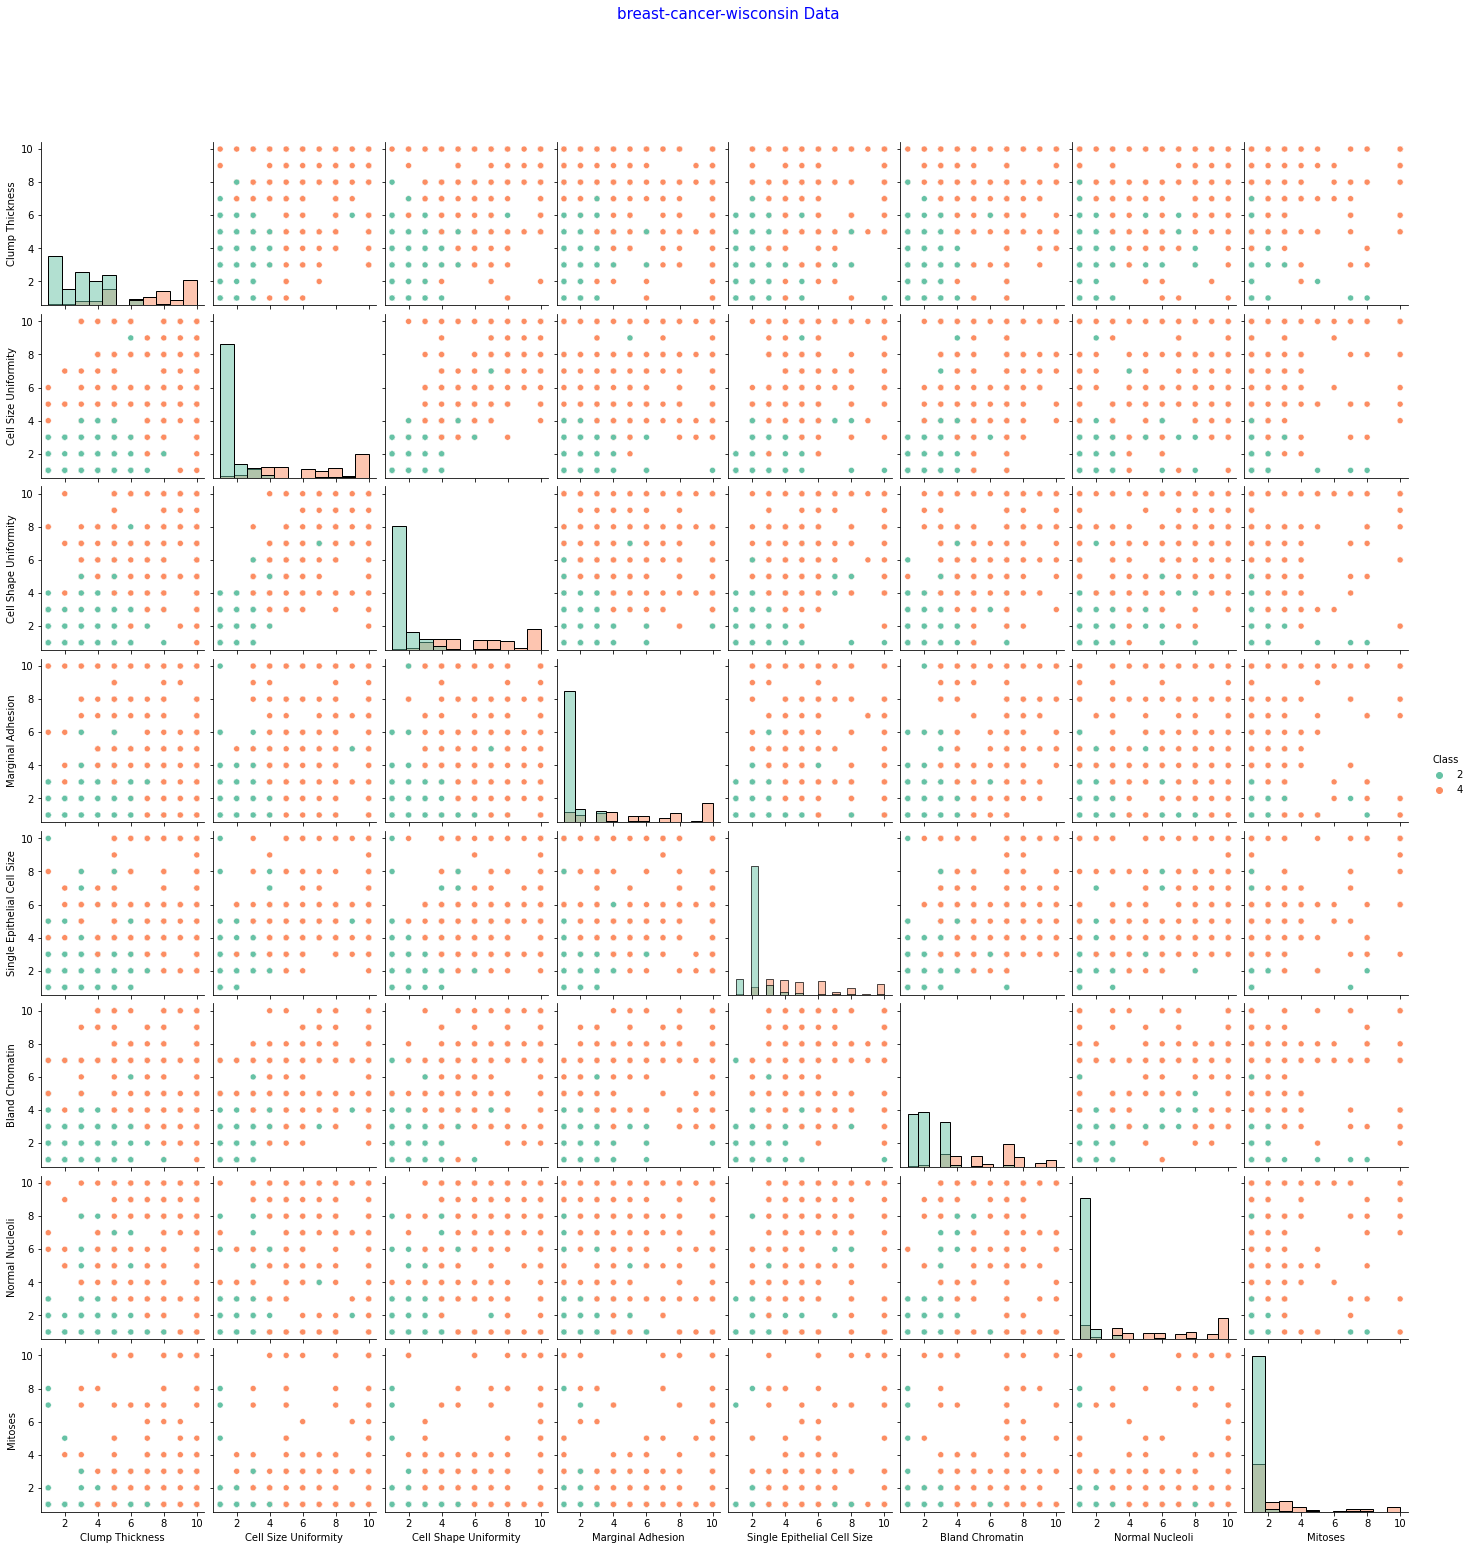

In [55]:
# Pairplot
plt.figure(0)
f0 = sns.pairplot(cell_df, hue="Class", palette="Set2", diag_kind="hist")
f0.fig.suptitle("breast-cancer-wisconsin Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

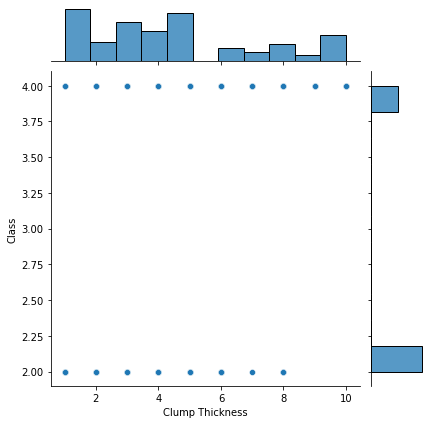

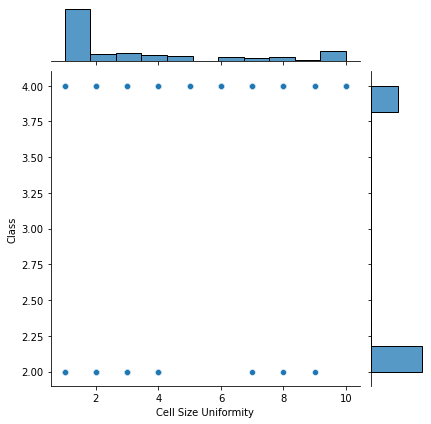

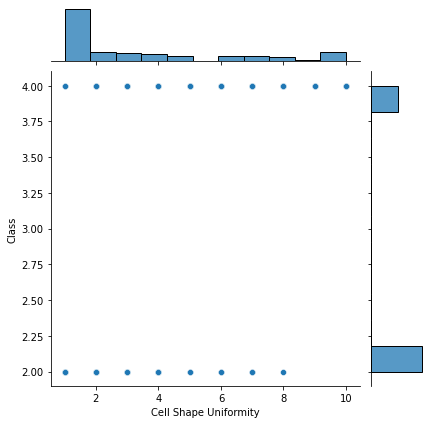

In [56]:
# now we visualise the data with seaborn
import seaborn as sns  
df = cell_df
# seaborn.pairplot takes too much time because dataset has too many columns that why we should make plots joint wise instead of pairwise
# joint wise plotting
sns.jointplot(x = df['Clump Thickness'], y = df['Class'], kind = 'scatter')
# For Plot 2
sns.jointplot(x = df['Cell Size Uniformity'], y = df['Class'], kind = 'scatter')
sns.jointplot(x = df['Cell Shape Uniformity'], y = df['Class'], kind = 'scatter')
# similary for remaining features
plt.show()


### Get the Dependent and Independent Variables

In [57]:
# Get the independent variables

feature_df = cell_df.drop(columns=['Class'])
X = np.asarray(feature_df)
X[0:5] #display first five rows as a check

array([[5, 1, 1, 1, 2, '1', 3, 1, 1],
       [5, 4, 4, 5, 7, '10', 3, 2, 1],
       [3, 1, 1, 1, 2, '2', 3, 1, 1],
       [6, 8, 8, 1, 3, '4', 3, 7, 1],
       [4, 1, 1, 3, 2, '1', 3, 1, 1]], dtype=object)

In [58]:
# Get the dependent variables
cell_df['Class'] = cell_df['Class']
y = np.asarray(cell_df['Class'])
y [0:5] #display first five elements as a check

array([2, 2, 2, 2, 2])

### Split the data from the 70% for train data and 30% for test data

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (478, 9) (478,)
Test set: (205, 9) (205,)


### Train the model

 OBS: since the classes are non-lineraly separated, we need a non-linear kernel

In [60]:
# Import the svm module from the scikit learn library
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.7)

In [61]:
# now we train the model
clf.fit(X_train, y_train) 

SVC(gamma=0.7)

### Test the model

In [62]:
# test the model by making predictions on the test set
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

### Model Evaluation

In [63]:
# now we import the confusion matrix for model evalution

from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
      """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



              precision    recall  f1-score   support

           2       1.00      0.83      0.91       132
           4       0.77      1.00      0.87        73

    accuracy                           0.89       205
   macro avg       0.88      0.92      0.89       205
weighted avg       0.92      0.89      0.89       205

Confusion matrix, without normalization
[[110  22]
 [  0  73]]


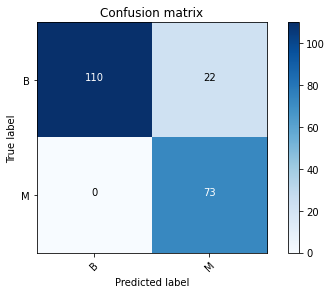

In [65]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['B','M'],normalize= False,  title='Confusion matrix')
